# ECON 220 - Data Science for Economists
## Week 7 - Data visualization
### Instructor: Jafet Baca-Obando

## Step 1. Import required packages

We have been largely using `matplotlib.pyplot` to visualize data. Today we will be using a new library, `seaborn`.

Make sure to install the seaborn package if you haven't already.

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # New package

## Step 2. Load the data

**Remember our new technique**. Instead of finding the file path manually, we can ask the `os` package to do it for us. Just make sure that the file is in the same folder as your notebook.

In [4]:
# Find working directory
import os
path = os.getcwd()
print(path)

c:\Users\jbaca\OneDrive\Documents\2. Ph.D. in Economics\Courses\Semester 7 - Fall 2025\ECON 220 - Data Science for Economists - Lab\Lectures\Week 7


In [5]:
# Import data
data = pd.read_csv('college.csv')

# First 10 rows
data.head(10)

,id,name,city,state,region,highest_degree,control,gender,admission_rate,sat_avg,undergrads,tuition,faculty_salary_avg,loan_default_rate,median_debt,lon,lat
0,102669,Alaska Pacific University,Anchorage,AK,West,Graduate,Private,CoEd,0.4207,1054,275,19610,5804,0.077,23250.0,-149.900278,61.218056
1,101648,Marion Military Institute,Marion,AL,South,Associate,Public,CoEd,0.6139,1055,433,8778,5916,0.136,11500.0,-87.319165,32.632354
2,100830,Auburn University at Montgomery,Montgomery,AL,South,Graduate,Public,CoEd,0.8017,1009,4304,9080,7255,0.106,21335.0,-86.299969,32.366805
3,101879,University of North Alabama,Florence,AL,South,Graduate,Public,CoEd,0.6788,1029,5485,7412,7424,0.111,21500.0,-87.677251,34.799810
4,100858,Auburn University,Auburn,AL,South,Graduate,Public,CoEd,0.8347,1215,20514,10200,9487,0.045,21831.0,-85.480782,32.609857
5,100663,University of Alabama at Birmingham,Birmingham,AL,South,Graduate,Public,CoEd,0.8569,1107,11383,7510,9957,0.062,21941.5,-86.802490,33.520661
6,101480,Jacksonville State University,Jacksonville,AL,South,Graduate,Public,CoEd,0.8326,1041,7060,7092,6801,0.096,23000.0,-85.761354,33.813713
7,102049,Samford University,Birmingham,AL,South,Graduate,Private,CoEd,0.5954,1165,3033,27324,8367,0.007,23000.0,-86.802490,33.520661
8,101709,University of Montevallo,Montevallo,AL,South,Graduate,Public,CoEd,0.7430,1070,2644,10660,7437,0.103,23266.0,-86.864156,33.100675
9,100751,The University of Alabama,Tuscaloosa,AL,South,Graduate,Public,CoEd,0.5105,1185,29851,9826,9667,0.063,23750.0,-87.569173,33.209841


This dataset comprises information on 1269 colleges and universities in the United States, including details such as tuition fees, average SAT scores, acceptance rates, graduation rates, and more.

Let's take a look at the data types of the dataset columns.

In [6]:
# Data's information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1269 entries, 0 to 1268
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1269 non-null   int64  
 1   name                1269 non-null   object 
 2   city                1269 non-null   object 
 3   state               1269 non-null   object 
 4   region              1269 non-null   object 
 5   highest_degree      1269 non-null   object 
 6   control             1269 non-null   object 
 7   gender              1269 non-null   object 
 8   admission_rate      1269 non-null   float64
 9   sat_avg             1269 non-null   int64  
 10  undergrads          1269 non-null   int64  
 11  tuition             1269 non-null   int64  
 12  faculty_salary_avg  1269 non-null   int64  
 13  loan_default_rate   1267 non-null   float64
 14  median_debt         1269 non-null   float64
 15  lon                 1269 non-null   float64
 16  lat   

## Step 3. Visualizing scatterplots with **seaborn**

Could there be any relationship between tuition and average SAT score? A scatterplot can help us find out.

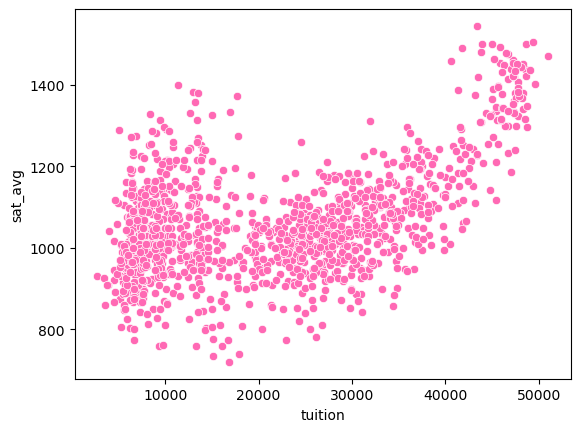

In [7]:
# Plot correlation between tuition and SAT score
scatter = sns.scatterplot(data, x='tuition', y='sat_avg', color='hotpink')

It seems that there is a positive relationship between tuition and average SAT score. But a lot of data points with low tuition levels display relatively high SAT scores. 

Could it be that these are public schools? Let's color the points by whether the school is public or private.

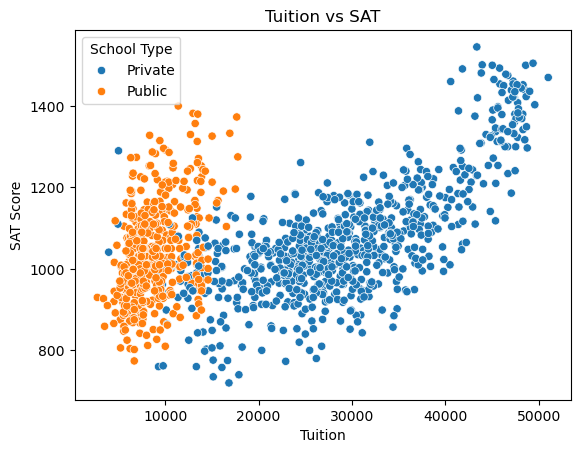

In [8]:
scatter = sns.scatterplot(data, x='tuition', y='sat_avg', hue='control')
# Change title and labels
scatter.set(title = 'Tuition vs SAT', xlabel = 'Tuition', ylabel = 'SAT Score')
# Modify legend: because seaborn is based on matplotlib, so use plt
plt.legend(title='School Type')

We can improve this visualization by using two different plots, one for public and another for private institutions, beside each other. This is called a facet grid.

We can do this using the `relplot()` function from seaborn.

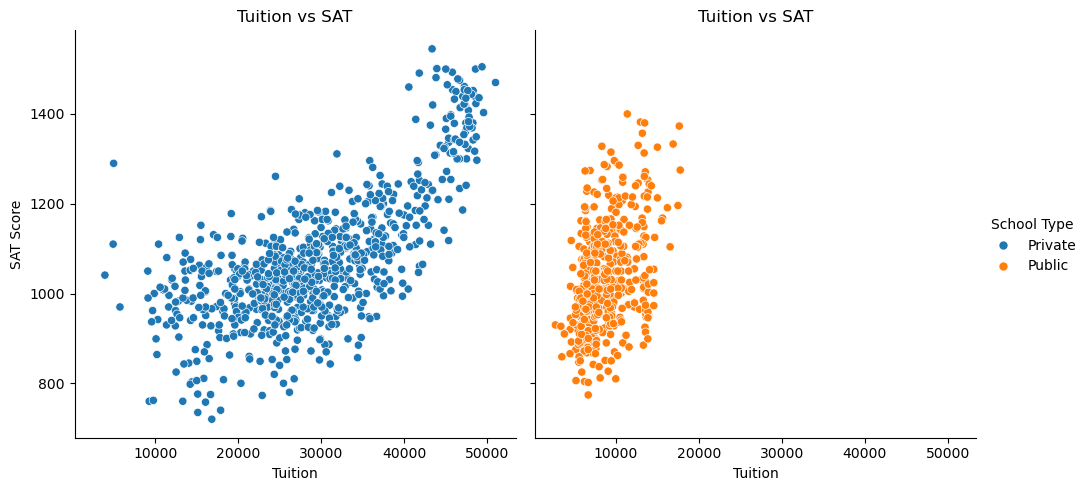

In [9]:
# Split scatterplot into two: use "relplot()"
scatter = sns.relplot(data, x='tuition', y='sat_avg', hue='control', col='control')
# Change title and labels
scatter.set(title = 'Tuition vs SAT', xlabel = 'Tuition', ylabel = 'SAT Score')
# Modify legend for two plots side by side:
scatter._legend.set_title('School Type')
# plt.legend() can only modify legend within 1 plot

Let's add trend lines to each scatterplot. This can be done using the `lmplot()` function from seaborn, which fits and plots a linear regression model.

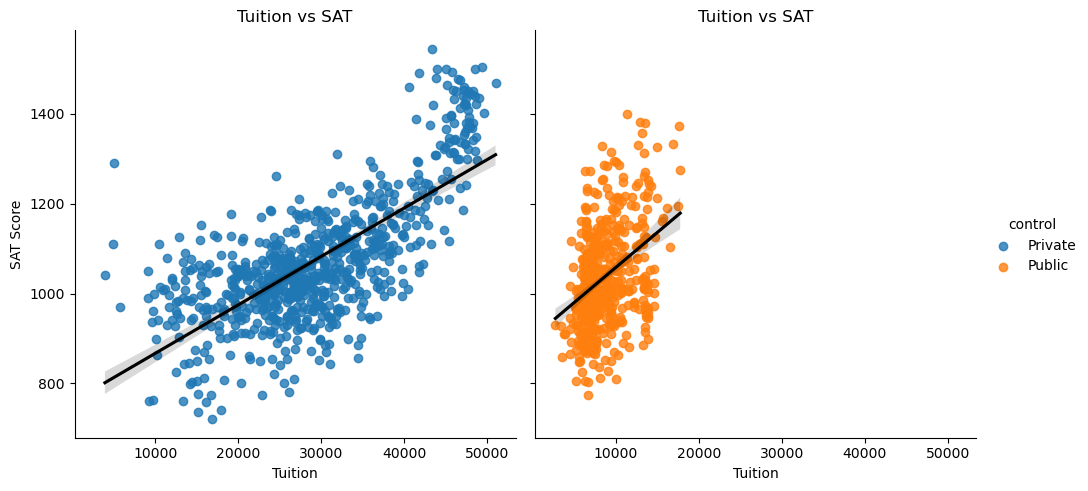

In [10]:
# Add linear line: use "lmplot()"
scatter = sns.lmplot(data, x='tuition', y='sat_avg', hue='control', col='control', line_kws={'color':'black'})
# Change title and labels
scatter.set(title = 'Tuition vs SAT', xlabel = 'Tuition', ylabel = 'SAT Score').add_legend()
# Use .add_legend() to bring back the legend

**Important note**. This analysis is correlational, not causal. We are not saying that higher tuition causes higher SAT scores or vice versa. There could be other factors at play.

## Step 4. Using bar charts

Bar charts are useful for comparing quantities across different categories. 

They make it easy to visualize differences, spot trends, and identify patterns in categorical data, such as comparing average values or totals between groups. 

This helps in quickly understanding and communicating insights from the data.

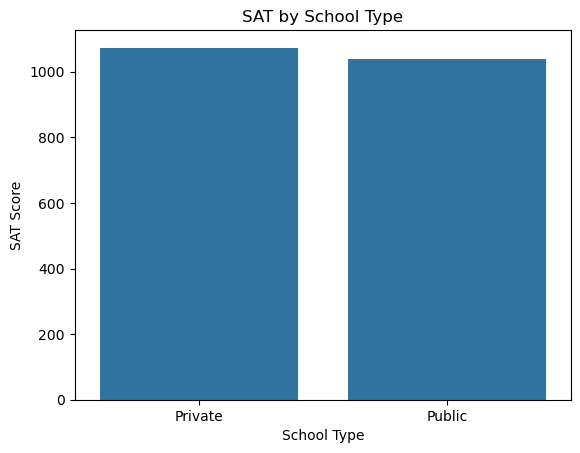

In [13]:
# Barplot to compare average SAT score between public and private universities
bar = sns.barplot(data, x='control', y='sat_avg', errorbar=None);
bar.set(title = 'SAT by School Type', xlabel = 'School Type', ylabel = 'SAT Score');

We can also compare average median debt among schools by highest degree offered.

[Text(0.5, 1.0, 'Median Debt by School Type'),
 Text(0.5, 0, 'Highest Degree'),
 Text(0, 0.5, 'Median Debt')]

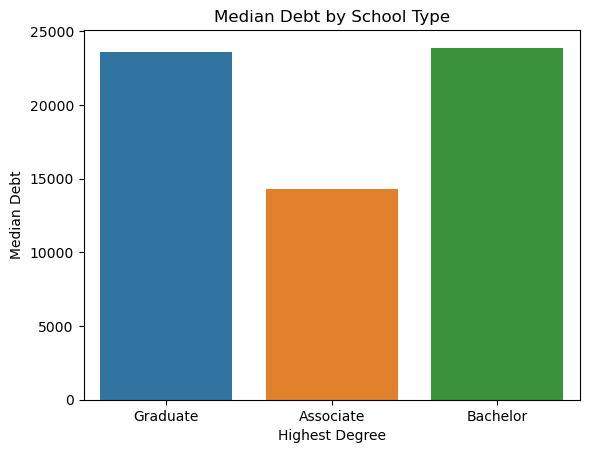

In [14]:
bar = sns.barplot(data, x='highest_degree', y='median_debt', hue='highest_degree', errorbar=None)
bar.set(title = 'Median Debt by School Type',
        xlabel = 'Highest Degree', ylabel = 'Median Debt')


Finally, let's compare tuition by region.

[Text(0.5, 1.0, 'Tuition by Region'),
 Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Tuition')]

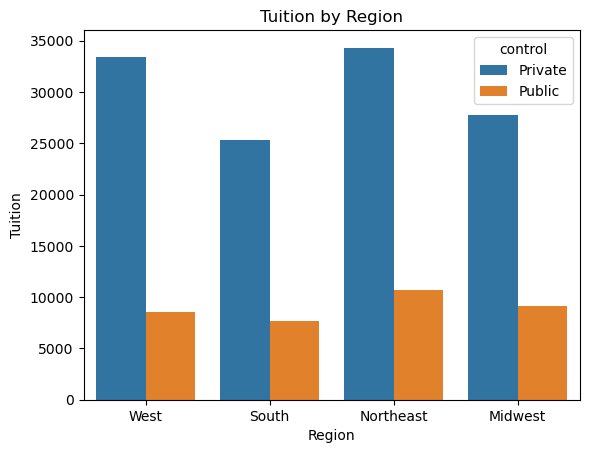

In [15]:
bar = sns.barplot(data, x='region', y='tuition', hue='control', errorbar=None)
bar.set(title = 'Tuition by Region', xlabel = 'Region', ylabel = 'Tuition')

In [16]:
!jupyter nbconvert --to html "Week 7. Data Visualization.ipynb"

[NbConvertApp] Converting notebook Week 7. Data Visualization.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 937721 bytes to Week 7. Data Visualization.html
